In [1]:
from ast import literal_eval  
import math   
import matplotlib.pyplot as plt
import numpy as np
import os  
import pandas as pd
import seaborn as sns
import time

from collections import defaultdict
from matplotlib.colors import to_rgb
from matplotlib.collections import PolyCollection   

In [2]:
datasetTimepoint = "clinicians"
target = "disease_severity"
#### Feature selection:
vars = "clinicians_vars"    # boruta+bestSterols
varPath = f"../../results/featureSelection/{datasetTimepoint}/{vars}.txt"
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()

folder = f"../../results/prediction/featureSelection/{datasetTimepoint}/{vars}/modelComparison/zigaPipeline"
folderFigures =  f"../../figures"
os.makedirs(folderFigures, exist_ok=True)

#model = "rfc"

In [4]:
''' Load data'''
dataframes_before = {}
dataframes_after = {} 
dataframes_features = {} 
dataframes_importances = {} 

models = ['rfc']#, 'gpr', 'abc','log', 'knn', 'mlp', 'gnb', 'qda', 'mcl'] #'svc'

In [5]:
df_scoring = pd.DataFrame()
for model in models:
    df = pd.read_csv(folder+f"/prediction_cv_test_{model}.csv")   
    df_scoring = pd.concat([df_scoring, df], axis=0)

df_scoring.to_csv(f"{folderFigures}/LOOCV_modelComparison_scoring.csv", index=False)
df_scoring

,precision,recall,f1,accuracy,model,auc
0,0.875,0.940299,0.906475,0.841463,rfc,0.744776


Text(0.5, 1.0, 'clinical')

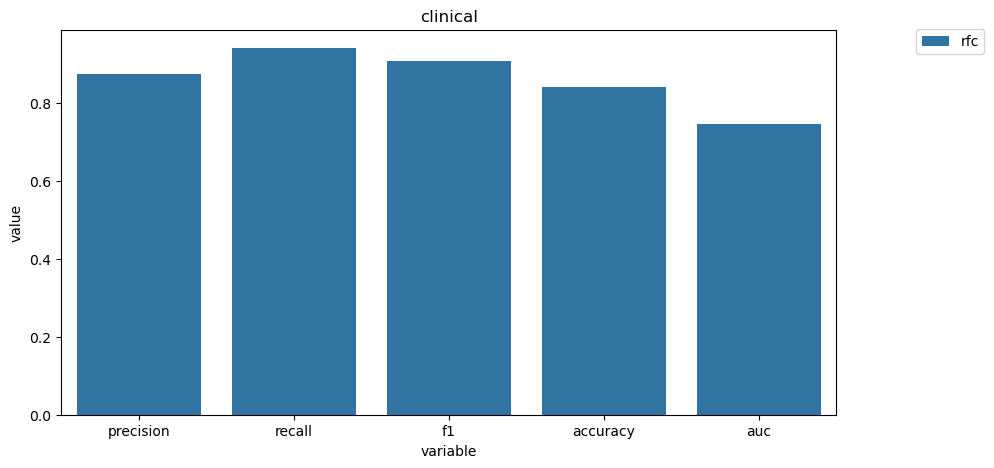

In [6]:
df_scoring_plot = df_scoring.melt("model")

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df_scoring_plot, x="variable", y="value", hue="model")
ax.legend(bbox_to_anchor=(1.2, 1.02))
ax.set_title("clinical")

In [7]:
df_scoring.index=df_scoring["model"]
df_scoring_bestModel = df_scoring.drop(["model"], axis=1)
df_scoring_bestModel.idxmax()

precision    rfc
recall       rfc
f1           rfc
accuracy     rfc
auc          rfc
dtype: object

# Feature importance

In [10]:
models = ["rfc"]
df_importances = pd.read_csv(folder + f"/importances_test_{models[0]}.csv")   

#get distribution of selection ratio
df_importances_sf = df_importances.copy()  
df_importances_sf["n"] = np.sum(df_importances_sf.iloc[:,1:-1] > 0, axis = 1) 
N = len(df_importances_sf.columns) - 3
df_importances_sf["importance"] = df_importances_sf["n"]/N    

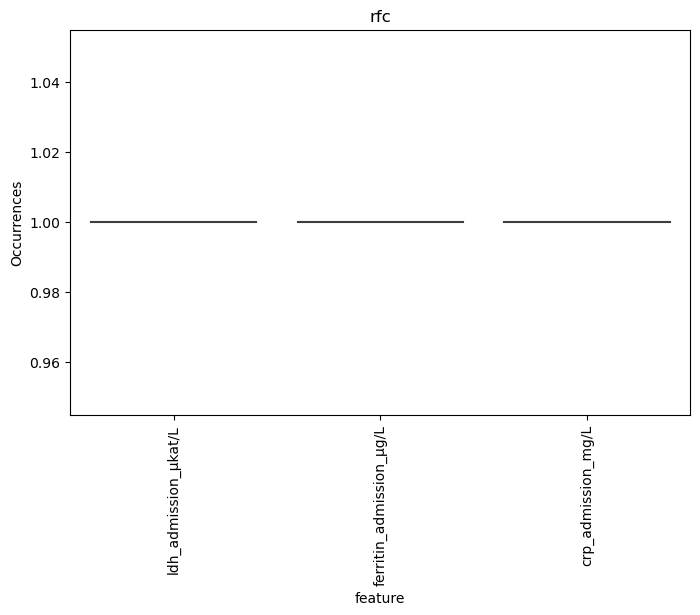

In [11]:
fig, axes = plt.subplots(len(models), 1, figsize=(8,5))  
for index, model in enumerate(models):    
    df_importances_sf_model = df_importances_sf[df_importances_sf.model == model] 
      
    ax = sns.violinplot(data=df_importances_sf_model, inner="stick", ax=axes, x="feature", y="importance",  order=sel_variables, cut=0, scale="width") #color = sns.color_palette("hls", 8)[5]     
    ax.set_ylabel("Occurrences")    #axes[index]
    ax.set_title(model)
    ax.tick_params(axis='x', rotation=90)